<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_Perceptron_learning_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

This tutorial explores the perceptron. The perceptron as a concept is relatively simple and is thus not often used on its own as a method in modern machine learning. However it serves as an important building block for more capable machine learning models, such as neural networks which have led to the advanced field of deep learning. 

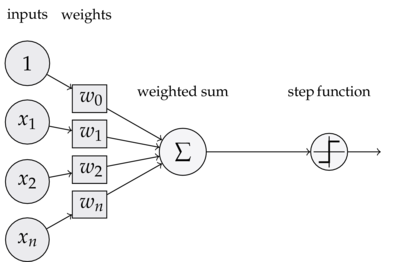

The perceptron (illustrated in the figure above) is a binary classifier which takes as input a vector, $\mathbf{x} = [x_1, x_2, \dotsc, x_n]^T$, and outputs a binary prediction $y \in \{-1, +1\}$. It does this by first producing a scalar value by multiplying each element in the input vector with a learned weight of the perceptron, $\mathbf{w} = [w_1, w_2, \dotsc, w_n]^T$ and then summing all the resulting elements together. This operation can be expressed as a vector dot product $\mathbf{w}^T \mathbf{x}$. The perceptron then checks if this scalar value $\mathbf{w}^T \mathbf{x}$ is greater or smaller than a threshold $t$. If the value is greater than the threshold then the perceptron predicts $y = +1$ otherwise it predicts $y = -1$. This can be expressed as a linear predictor where

$y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge t \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} \lt t
      \end{cases}
$

This formulation is inconvenient as it includes an extra threshold parameter that is not part of the model. A common trick is to include it as a so called bias. We prepend $x_0 = 1$ to the input $\mathbf{x}$ such that $\mathbf{x} = [x_0, x_1, x_2, \dotsc, x_n]^T$ and $\mathbf{w} = [w_0, w_1, w_2, \dotsc, w_n]^T$. The weight $w_0$ will now represent the threshold (more precisely $w_0 = -t$) as $\mathbf{w}^T \mathbf{x} = \sum_{i=1}^n w_i x_i + w_0 x_0$ where $x_0 = 1$. 

With the bias, the linear predictor turns into

$y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge 0 \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} \lt 0
      \end{cases} = sign(\mathbf{w}^T \mathbf{x})
$

This is the mathematical formulation of the perceptron. However, this does not discuss how the weights $\mathbf{w}$ are learned. For this we need to go into the learning algorithms that are associated with the perceptron. To get a better understanding of these algorithms, this tutorial will show the python (currently the most commonly used language in machine learning) code needed to run these algorithms together with visualisations that provides more clarification.

The learning process in perceptron happens iteratively by updating the weights until a decision boundary is reached (in case we are dealing with linearly seperable data). Initial weights of the perceptron can be set to a vector of zeros, i.e. $\mathbf{w} = \mathbf{0}$. The algorithm takes each data point $x_i$ and classifies it using the current perceptron weights as either $+1$ or $-1$ using $sign(\mathbf{w}^T \mathbf{x})$. If the classification is incorrect such that the predicted value does not match the corresponding label, i.e. $sign(\mathbf{w}^T \mathbf{x}) \ne y_i$ then we stop iterating through the dataset and we update the learned weights of our perceptron such that the rule is given as $\mathbf{w} \leftarrow \mathbf{w} + y_i x_i$. We can also specify for the algorithm the number of iterations that it will run for. For this we need to go into the learning algorithms that are associated with the perceptron. To get a better understanding of these algorithms, this tutorial will show the python (currently the most commonly used language in machine learning) code needed to run these algorithms together with visualisations that provides more clarification.

## This Code is from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015 (page 25), with modifications.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In this tutorial, we will be using the famous Iris flower  dataset for testing our perceptron. The Iris flowers dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris - Versicolor, Virginica and Setosa.

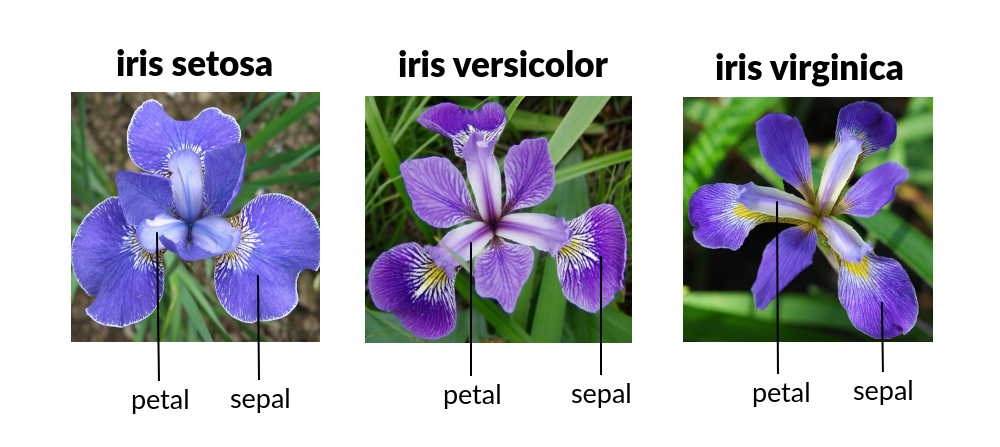

In [2]:
# We can use the sklearn package in order to import the data directly. Or you can dowload it as csv file and import it.
from sklearn.datasets import load_iris
iris = load_iris()

# This command generates a decsription of the dataset if you need more information 
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


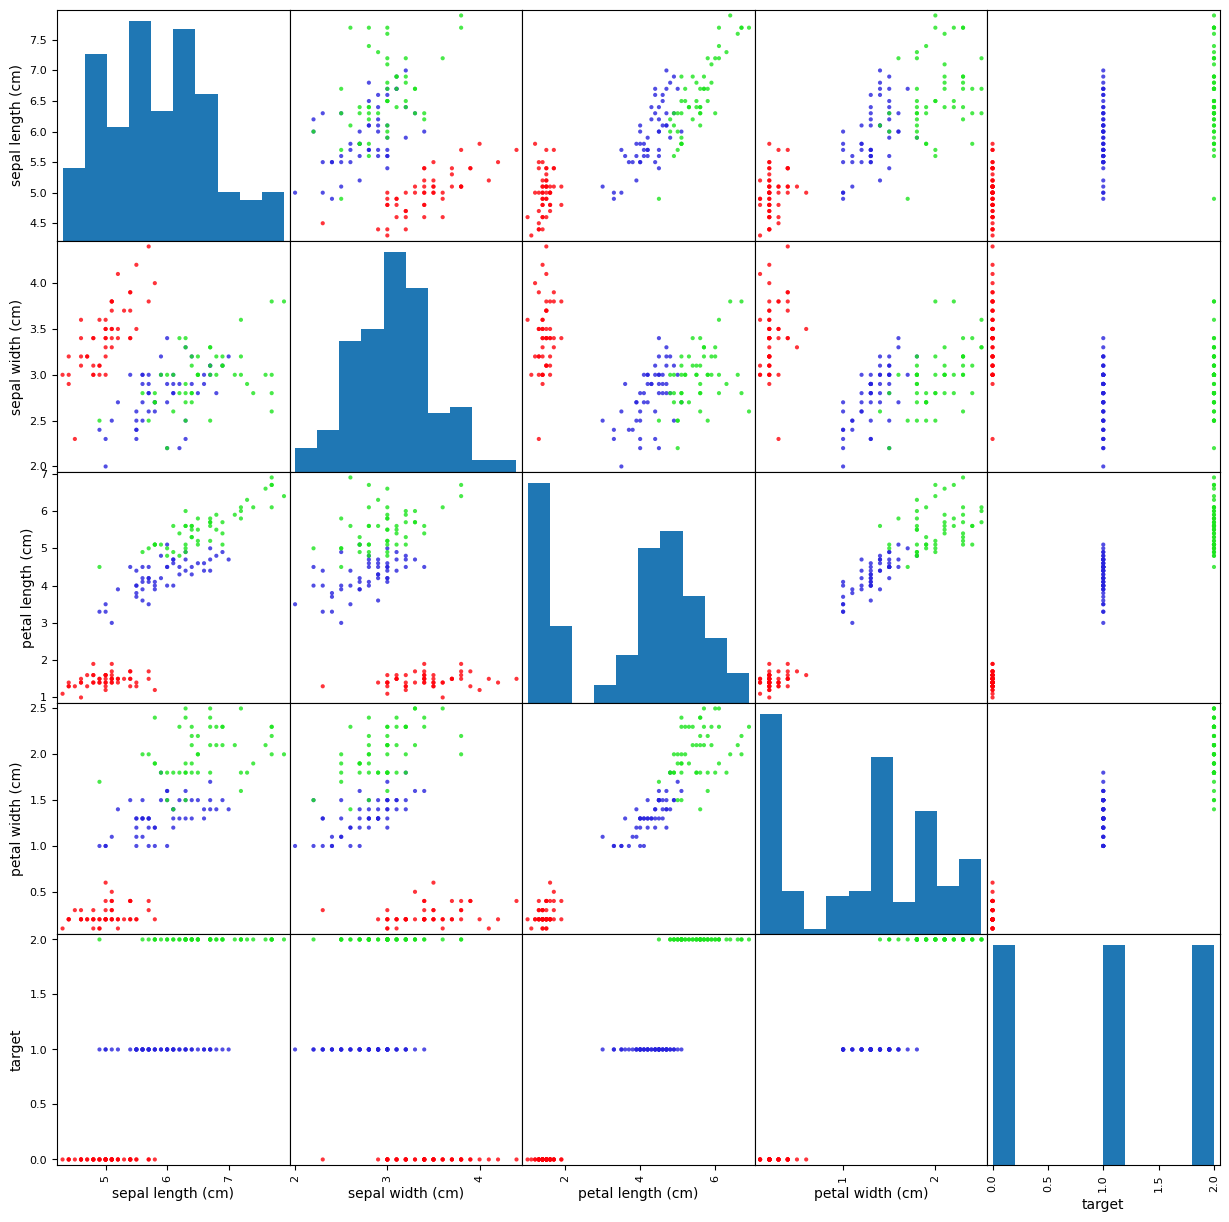

In [3]:
# You can visulaise the Iris data using the following cell for better understanding 
# Note: the last column of this data represesent the labels, where 0 -> Setosa, 1 -> Versicolor, 2 -> Virginica

from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_dictionary = {1: "#FE010A", 2: "#2722DD", 3: "#1BE41D"}
colors = iris_data["target"].map(lambda x: color_dictionary.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.8, figsize=(15, 15), diagonal='hist')

iris_data

#scroll down to see the plots

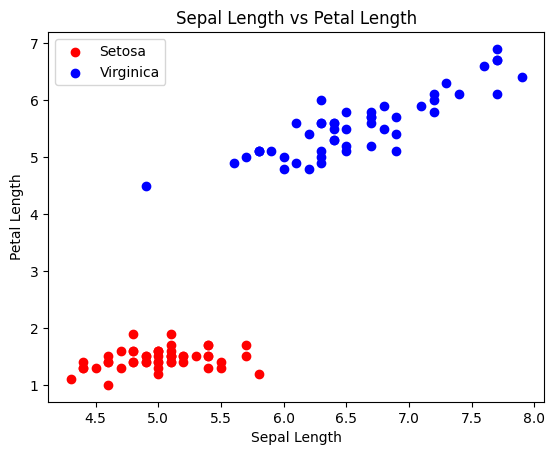

In [4]:
# We will use the perceptron as binary classifier, therefore we will choose two classes from the three. Let it be Setosa 
# and Virginica. Furthermore, for better data visualisation, we will consider two features; petal length and sepal length
# this will make us see the features in 2D plot. 


# The following line of code will include the labels for Setosa and Virginica classes in one array and discard the Versicolor.
setosa_label = iris_data.iloc[0:50,4].values
virginica_label = iris_data.iloc[100:150,4].values
labels = np.concatenate((setosa_label,virginica_label))

# Note that from the original data Setosa is labelled as 0 and Virginica is labelled as 2. In order to match the labels 
# with our defined sign function for binary classification, we change the labels such as Setosa class has label -1 and 
# Virginica has a label 1 using the following code

y = np.where(labels == 0, -1, 1)

# The following line of code will consider the two features (petal length and sepal length only) for the Setosa and Virginica
# classes and combine the features in one array.

X_setosa = iris_data.iloc[0:50, [0,2]]
X_virginica = iris_data.iloc[100:150, [0,2]]
X = np.concatenate((X_setosa,X_virginica))

# We can plot the features in 2D plot such that the sepal length feature is represented by x-axis 
# and petal length  is represented by y-axis

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Virginica') 
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')    
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

# Perceptron Learning Algorithm (PLA)

Having prepared our data, we are now ready to take a look at our first learning algorithm - the Perceptron Learning Algorithm (PLA). The PLA is an iterative algorithm which iterates over each data points from the dataset.

Initial weights of the perceptron can be set to a vector of zeros, i.e. $\mathbf{w} = \mathbf{0}$. PLA then takes each data point $x_i$ and classifies it using the current perceptron weights as either $+1$ or $-1$ using $sign(\mathbf{w}^T \mathbf{x})$. The perceptron update rule is given as $\mathbf{w} \leftarrow \mathbf{w} + y_i x_i$. Note that the update is done only if the predicted label is incorrect and the weights are updated in the opposite direction to the prediction i.e., the predicted label was $+1$ while the true one was $-1$ and vice versa. In this way the error should decrease in the next iteration. After the update of the  weights, we go back to the first data point and start iterating through the points again. If the dataset is separable i.e. all data points can be classified correctly, then the algorithm will eventually iterate through all the  data points without any misclassification.

In [5]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)      

In [6]:
def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

In [7]:
def plot_boundary(W,X):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depeneds on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
        plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Virginica') 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()
        

In [8]:
def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()   
        

In [9]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            plot_boundary(W,X) #When weights are updated we plot the boundary
        plot_errors(errors_)
            

Iteration:  1
Weights:  [0.  2.4 9.2]


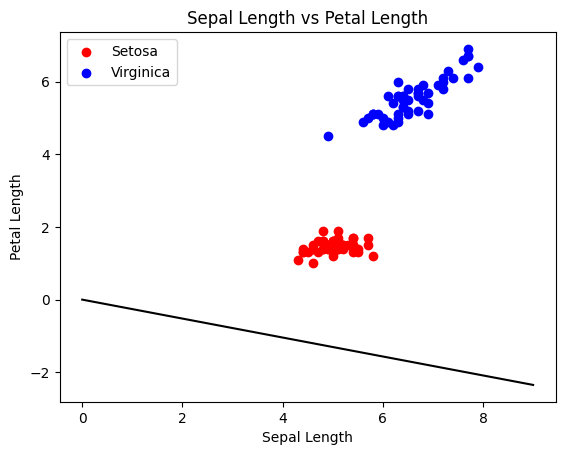

Iteration:  2
Weights:  [ 0.   4.8 18.4]


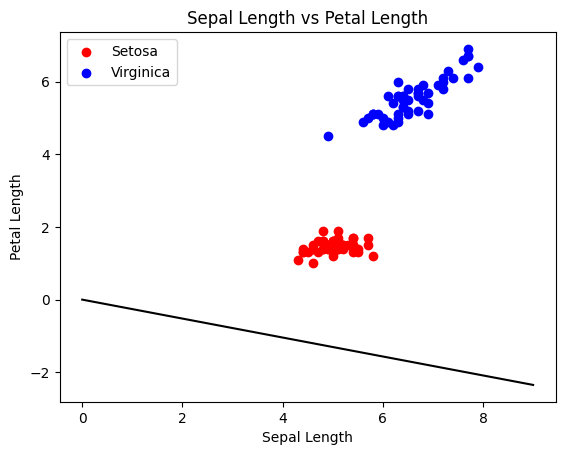

Iteration:  3
Weights:  [-2.  -2.4 23.8]


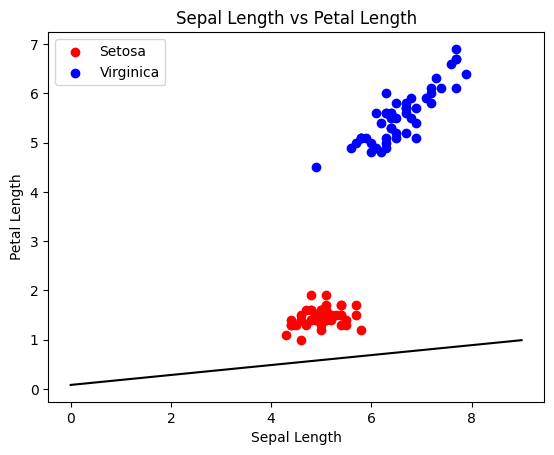

Iteration:  4
Weights:  [ -4.  -12.6  21. ]


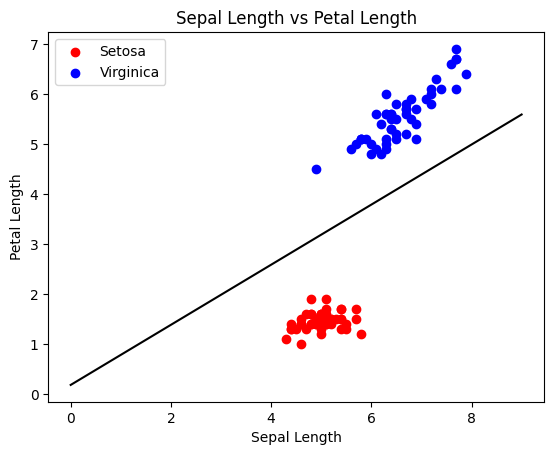

Iteration:  5
Weights:  [ -4.  -12.6  21. ]


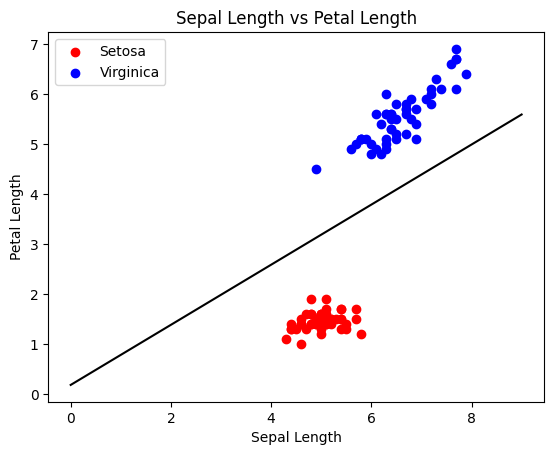

Iteration:  6
Weights:  [ -4.  -12.6  21. ]


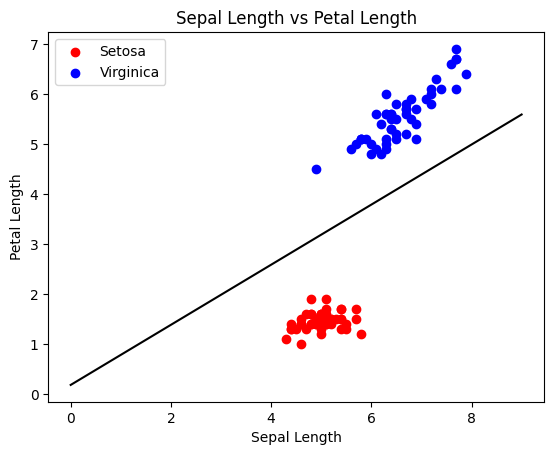

Iteration:  7
Weights:  [ -4.  -12.6  21. ]


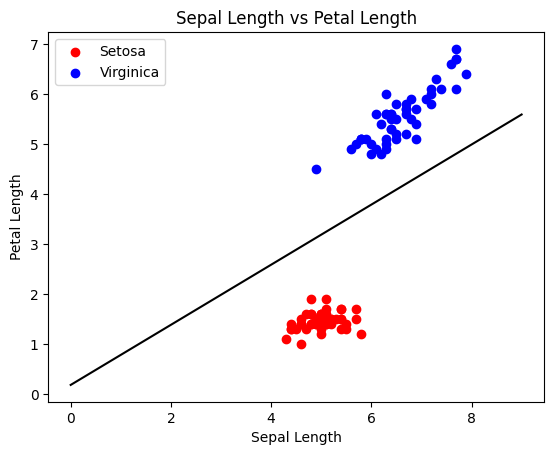

Iteration:  8
Weights:  [ -4.  -12.6  21. ]


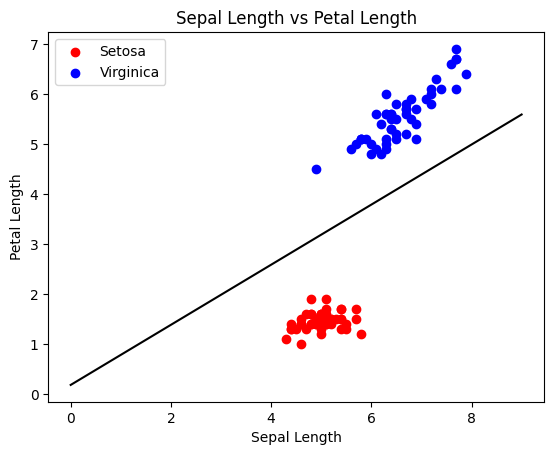

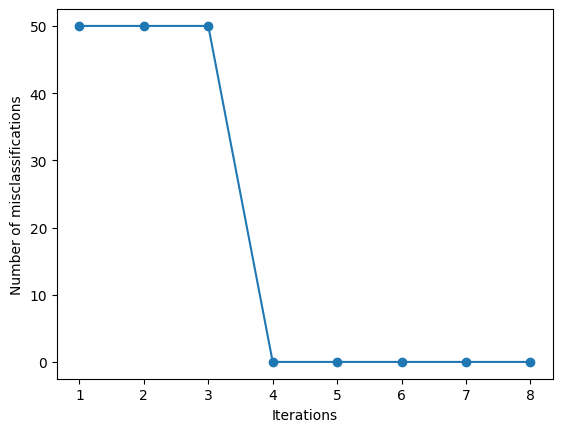

In [10]:
n_iter=8
fit(n_iter, X, y)

# Coursework:

## Task 1:

Insted of using the Setosa and Virginica as in the tutorial, repeat the previous steps for classifying the Setosa  and Versicolor classes while using the same two features that where used previousely (petal length and sepal length). Include in your report:

- Plot the graph that shows the classes can be linearly seperable.
- Run the perceptron algorithm for specific number of iterations.
- Plot the misclassification error.
- Report the final weights for the classifier.
- Show the codes you modified in each task of the above in your report.

Import data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df["target"] = iris['target']
df1 = df.drop(df[df.target == 2].index) # drop Virginica data
df1['target'].replace([0],-1, inplace=True) # Setosa=-1, Versicolor=1
df1.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
78,6.0,2.9,4.5,1.5,1
49,5.0,3.3,1.4,0.2,-1
59,5.2,2.7,3.9,1.4,1
58,6.6,2.9,4.6,1.3,1
22,4.6,3.6,1.0,0.2,-1


Plot the graph that shows the classes can be linearly seperable.

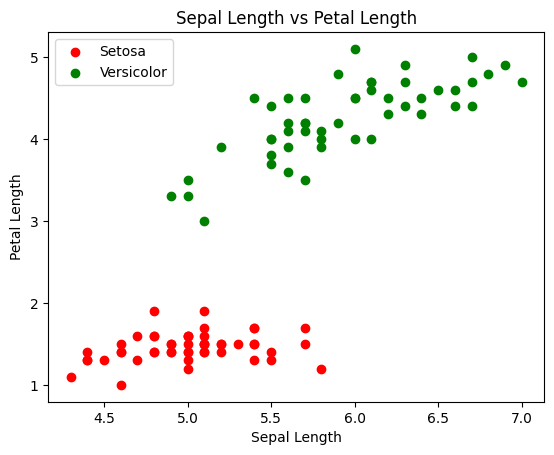

In [13]:
plt.scatter(df1[df1.target==-1].iloc[:,0], df1[df1.target==-1].iloc[:,2], color='red',marker='o',label='Setosa')
plt.scatter(df1[df1.target==1].iloc[:,0], df1[df1.target==1].iloc[:,2], color='green',marker='o',label='Versicolor')
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')    
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [14]:
X1 = df1.iloc[:,[0,2]].to_numpy()
y1 = df1.loc[:,'target'].to_numpy()

Labels changed.

In [15]:
def plot_boundary(W,X):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depeneds on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
        plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='o',label='Versicolor') 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()
        

Print final weights.

In [16]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            plot_boundary(W,X) #When weights are updated we plot the boundary
        plot_errors(errors_)
        print("Final weights: W = [%g,%g,%g]" % (W[0],W[1],W[2]))
            

Iteration:  1
Weights:  [0.  3.8 6.6]


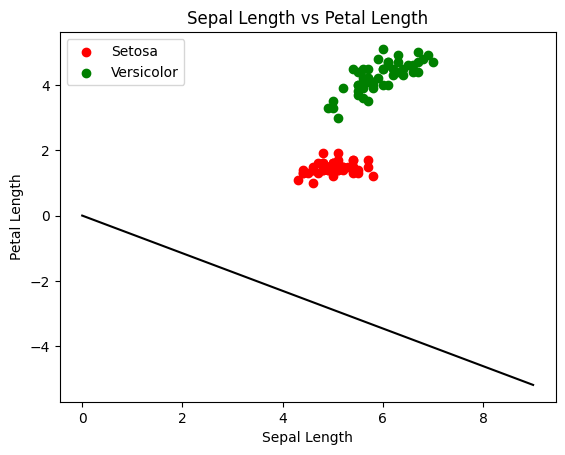

Iteration:  2
Weights:  [ 0.   7.6 13.2]


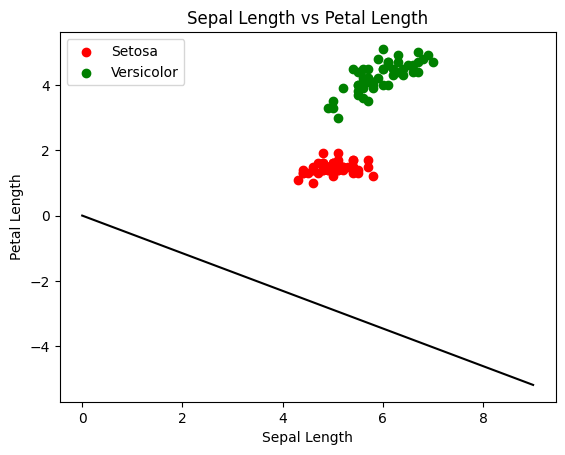

Iteration:  3
Weights:  [-2.   2.2 16.8]


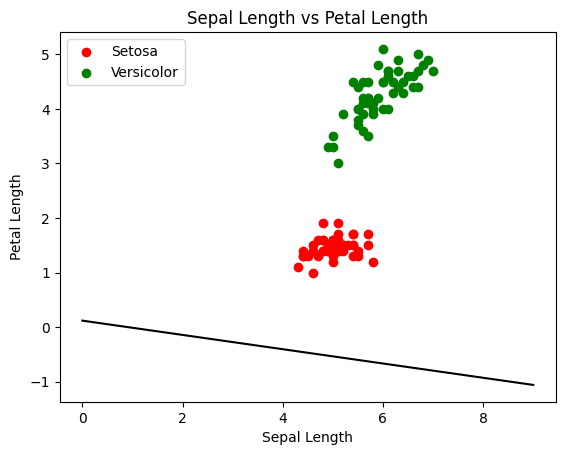

Iteration:  4
Weights:  [-2.   3.4 21. ]


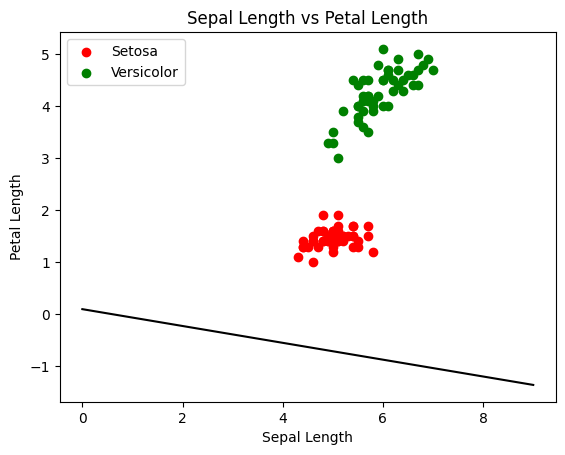

Iteration:  5
Weights:  [-4.  -6.8 18.2]


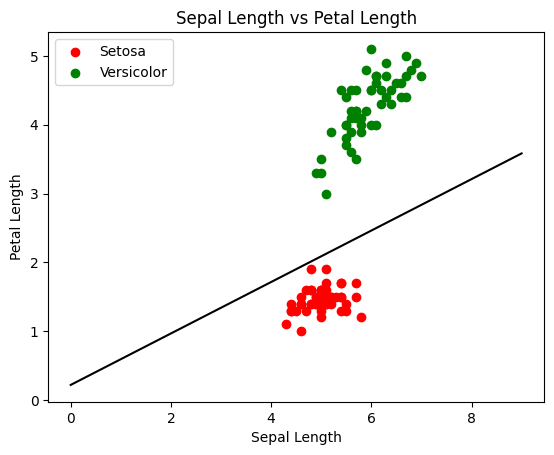

Iteration:  6
Weights:  [-4.  -6.8 18.2]


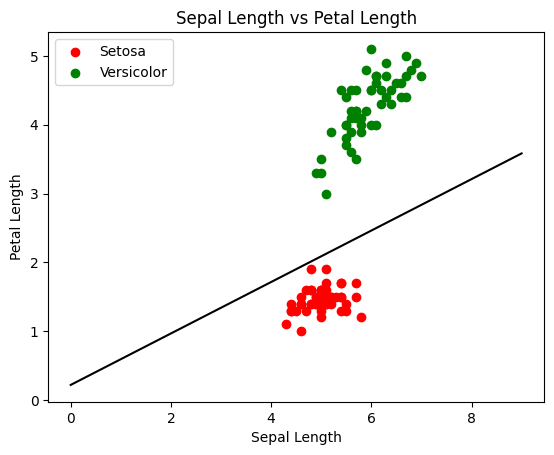

Iteration:  7
Weights:  [-4.  -6.8 18.2]


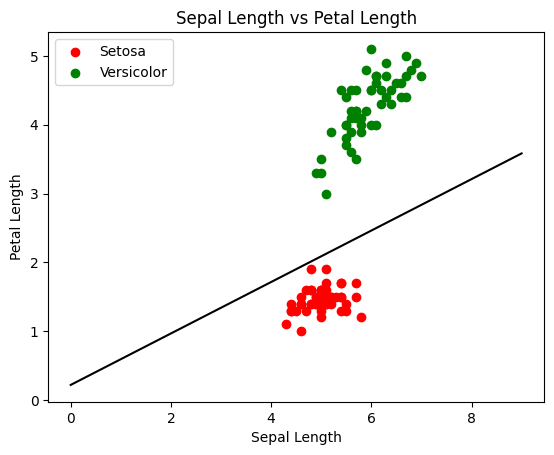

Iteration:  8
Weights:  [-4.  -6.8 18.2]


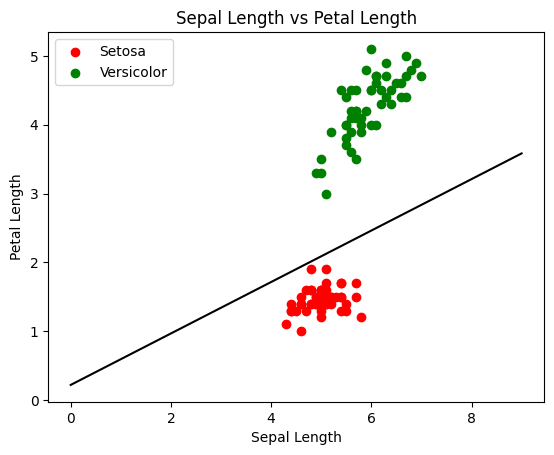

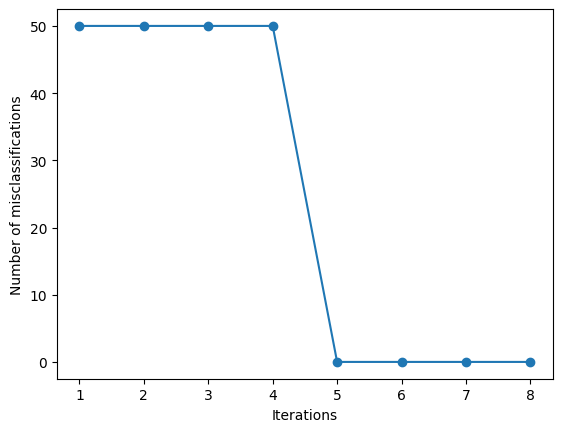

Final weights: W = [-4,-6.8,18.2]


In [17]:
n_iter=8
fit(n_iter, X1, y1)

## Task 2:

Consider now the Versicolor and Virginica classes while using the same two features that where used previousely (petal length and sepal length). Note: these classes are not linearly seperable, therefore the perceptron classifier cannot perfectly seperate the classes with a line as the case in the previous cases. Include in your report:

- Plot the graph that shows the classes are not linearly seperable.

- Revisit the code and adjust it such that it can choose the best iteration and weights according to the minimal misclassification error (this is called pocket algorithm). 

- Run the perceptron algorithm for specific number of iterations (*** Hint : choose larger number of iterations for this problem (e.g. 100).).

- Show how the decision boundary is changing while the weights are being updated.

- Plot the misclassification error.
- Report the best weights for the classifier.
- Show the codes you modified in each task of the above in your report.

Import data.

In [18]:
df2 = df.drop(df[df.target == 0].index) # drop Setosa data
df2['target'] = np.where(df2['target']==1,-1,1) # Versicolor=-1, Virginica=1
df2.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
64,5.6,2.9,3.6,1.3,-1
94,5.6,2.7,4.2,1.3,-1
63,6.1,2.9,4.7,1.4,-1
56,6.3,3.3,4.7,1.6,-1
103,6.3,2.9,5.6,1.8,1


Plot the graph that shows the classes are not linearly seperable.

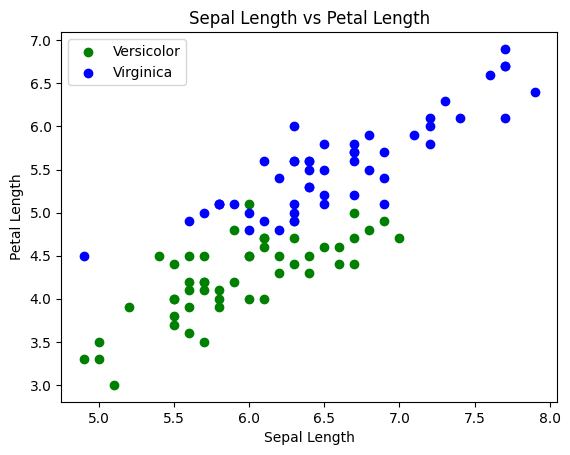

In [19]:
plt.scatter(df2[df2.target==-1].iloc[:,0], df2[df2.target==-1].iloc[:,2], color='green',marker='o',label='Versicolor')
plt.scatter(df2[df2.target==1].iloc[:,0], df2[df2.target==1].iloc[:,2], color='blue',marker='o',label='Virginica')
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')    
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [20]:
X2 = df2.iloc[:,[0,2]].to_numpy()
y2 = df2.loc[:,'target'].to_numpy()

In [40]:
def plot_boundary(W,X):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depeneds on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color='green',marker='x',label='Versicolor')
        plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='Virginica') 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()
        

Iteration:  1
Weights:  [ 0.  -1.4  2.6]


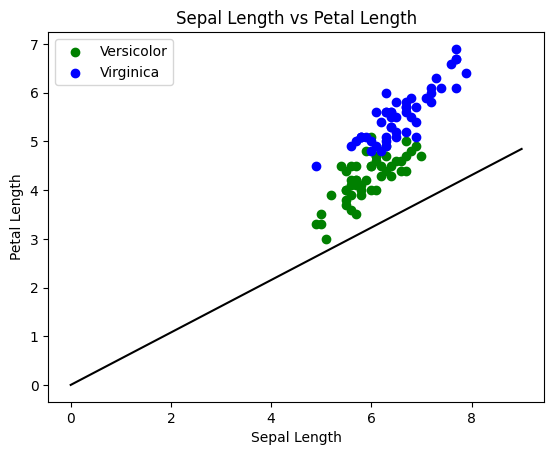

Iteration:  2
Weights:  [ 0.  -2.8  5.2]


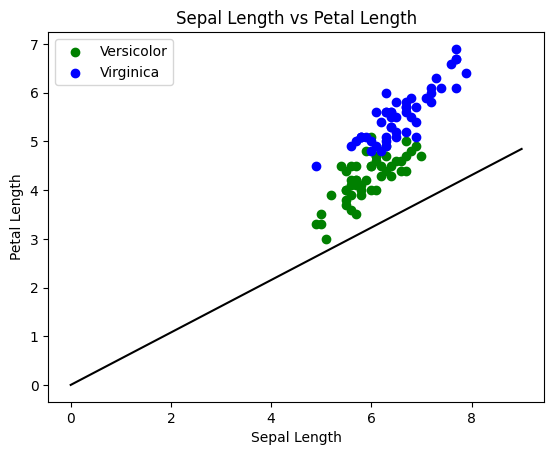

Iteration:  3
Weights:  [ 0.  -4.2  7.8]


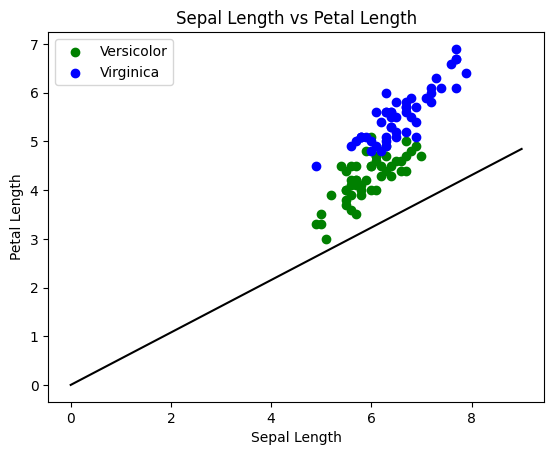

Iteration:  4
Weights:  [ 0.  -5.6 10.4]


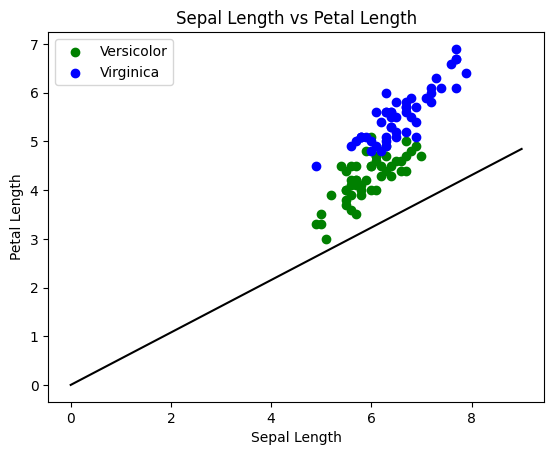

Iteration:  5
Weights:  [ 0. -7. 13.]


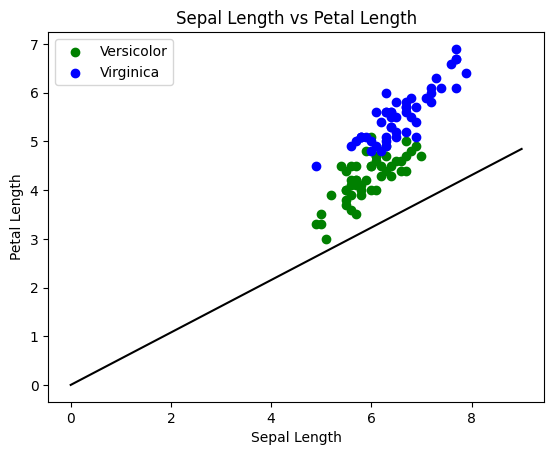

Iteration:  6
Weights:  [ 0.  -8.4 15.6]


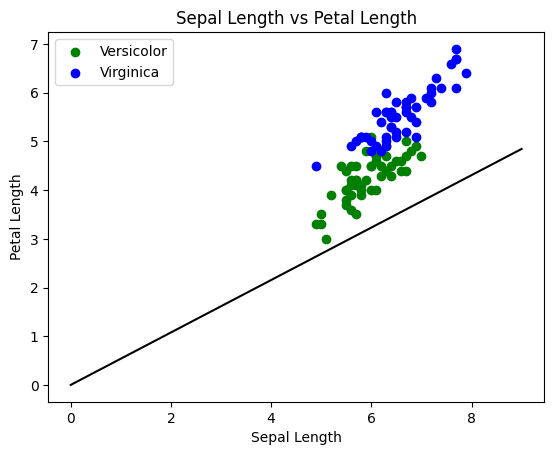

Iteration:  7
Weights:  [ 0.  -9.8 18.2]


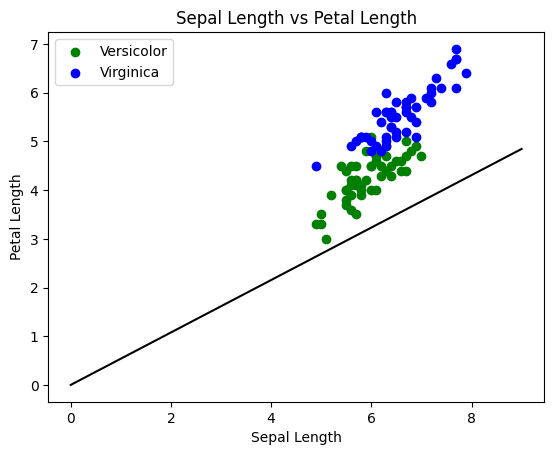

Iteration:  8
Weights:  [  0.  -11.2  20.8]


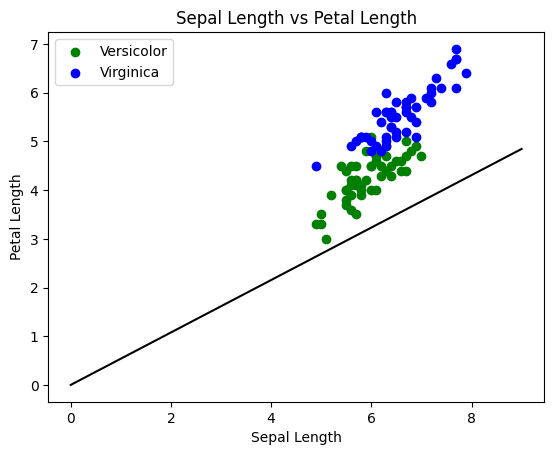

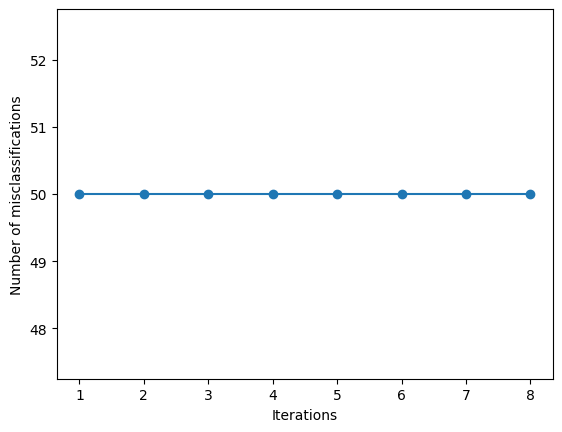

Final weights: W = [0,-11.2,20.8]


In [22]:
n_iter=8
fit(n_iter, X2, y2)

Model converges and misclassification error (number of updates) remains at 2. The weights of the first iteration are [0, -1.4, 2.6]. The pocket algorithm is implemented below:

In [38]:
def fit_pocket(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []
        # initialise global minimum error to remember the best weights
        min_error = len(y)
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
#             print("Iteration: %d\tWeight: [%g,%g,%g]\tError: %d" % (i, W[0],W[1],W[2], errors))
#             plot_boundary(W,X) #When weights are updated we plot the boundary
            
            # Store best weights (minimal misclassification error)
            if errors < min_error:
                i_best = i
                W_best = np.copy(W)
                min_error = errors
                
        plot_errors(errors_)
        print("Best result: iter=%d, W=[%g, %g, %g], error=%d" % (i_best, W_best[0],W_best[1],W_best[2], min_error))
        print("Plot for best result")
        plot_boundary(W_best,X)
            

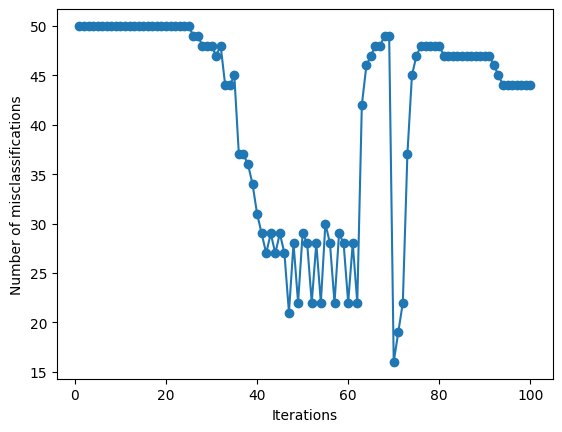

Best result: iter=70, W=[-2, -94.4, 128.2], error=16
Plot for best result


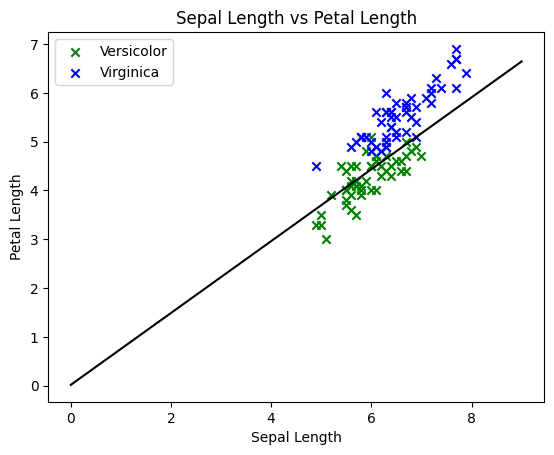

In [41]:
n_iter=100
fit_pocket(n_iter, X2, y2)